# EDA for Movie Recommendation System

## Part-I: Importing Libraries & Loading Dataset

In [258]:
# Import necessary libraries
import pandas as pd
import numpy as np
from collections import Counter

#for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

# for text processing
import nltk
from nltk.stem.porter import PorterStemmer
import ast
import re
import pickle

# for vectorization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [191]:
# Load dataset
df = pd.read_csv('data.csv')

In [192]:
# Display the first few rows
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer,imdb_rating,imdb_votes,poster_path
0,2,Ariel,7.1,335.0,Released,1988-10-21,0.0,73.0,0.0,tt0094675,...,suomi,"Heikki Salomaa, Hanna Jokinen, Matti Pellonpää...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Aki Kaurismäki,NaN,7.4,8761.0,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg
1,3,Shadows in Paradise,7.3,369.0,Released,1986-10-17,0.0,74.0,0.0,tt0092149,...,"suomi, English, svenska","Kati Outinen, Ulla Kuosmanen, Jaakko Talaskivi...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Mika Kaurismäki,NaN,7.5,7516.0,/nj01hspawPof0mJmlgfjuLyJuRN.jpg
2,5,Four Rooms,5.8,2623.0,Released,1995-12-09,4257354.0,98.0,4000000.0,tt0113101,...,English,"Quentin Tarantino, Jennifer Beals, Antonio Ban...","Alexandre Rockwell, Quentin Tarantino, Allison...","Rodrigo García, Guillermo Navarro, Phil Parmet...","Alexandre Rockwell, Quentin Tarantino, Allison...","Alexandre Rockwell, Quentin Tarantino, Lawrenc...",Combustible Edison,6.7,112570.0,/75aHn1NOYXh4M7L5shoeQ6NGykP.jpg
3,6,Judgment Night,6.5,331.0,Released,1993-10-15,12136938.0,109.0,21000000.0,tt0107286,...,English,"Cuba Gooding Jr., Peter Greene, David L. Crowl...",Stephen Hopkins,Peter Levy,"Jere Cunningham, Lewis Colick","Gene Levy, Lloyd Segan, Marilyn Vance",Alan Silvestri,6.6,19295.0,/3rvvpS9YPM5HB2f4HYiNiJVtdam.jpg
4,8,Life in Loops (A Megacities RMX),7.5,27.0,Released,2006-01-01,0.0,80.0,42000.0,tt0825671,...,"English, हिन्दी, 日本語, Pусский, Español",NaN,Timo Novotny,Wolfgang Thaler,"Michael Glawogger, Timo Novotny","Ulrich Gehmacher, Timo Novotny",NaN,8.2,284.0,/7ln81BRnPR2wqxuITZxEciCe1lc.jpg


#### Check dataset info
This gives us an overview of the data types, missing values, and memory usage.

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015110 entries, 0 to 1015109
Data columns (total 28 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1015110 non-null  int64  
 1   title                    1015099 non-null  object 
 2   vote_average             1015108 non-null  float64
 3   vote_count               1015108 non-null  float64
 4   status                   1015108 non-null  object 
 5   release_date             902730 non-null   object 
 6   revenue                  1015108 non-null  float64
 7   runtime                  1015108 non-null  float64
 8   budget                   1015108 non-null  float64
 9   imdb_id                  589791 non-null   object 
 10  original_language        1015108 non-null  object 
 11  original_title           1015099 non-null  object 
 12  overview                 836437 non-null   object 
 13  popularity               1015108 non-null 

In [195]:
df.shape

(1015110, 28)

## Part-II: Visualization

In [197]:
# Technical features: fields important for internal processes, identification, and referencing
technical_features = ['id', 'overview']

# Audience-focused features: fields most relevant for general audience preferences
audience_features = ['title', 'genres', 'cast', 'director']

# Combine both technical and audience-focused features
selected_columns = technical_features + audience_features

# Scale down the dataset to include only the selected columns
df_selected = df[selected_columns]

# Display the first few rows of the scaled-down dataset
print("Scaled-down dataset with relevant features:")
df_selected.head()

Scaled-down dataset with relevant features:


,id,overview,title,genres,cast,director
0,2,After the coal mine he works at closes and his...,Ariel,"Comedy, Drama, Romance, Crime","Heikki Salomaa, Hanna Jokinen, Matti Pellonpää...",Aki Kaurismäki
1,3,"Nikander, a rubbish collector and would-be ent...",Shadows in Paradise,"Comedy, Drama, Romance","Kati Outinen, Ulla Kuosmanen, Jaakko Talaskivi...",Aki Kaurismäki
2,5,It's Ted the Bellhop's first night on the job....,Four Rooms,Comedy,"Quentin Tarantino, Jennifer Beals, Antonio Ban...","Alexandre Rockwell, Quentin Tarantino, Allison..."
3,6,"Four young friends, while taking a shortcut en...",Judgment Night,"Action, Crime, Thriller","Cuba Gooding Jr., Peter Greene, David L. Crowl...",Stephen Hopkins
4,8,Timo Novotny labels his new project an experim...,Life in Loops (A Megacities RMX),Documentary,NaN,Timo Novotny


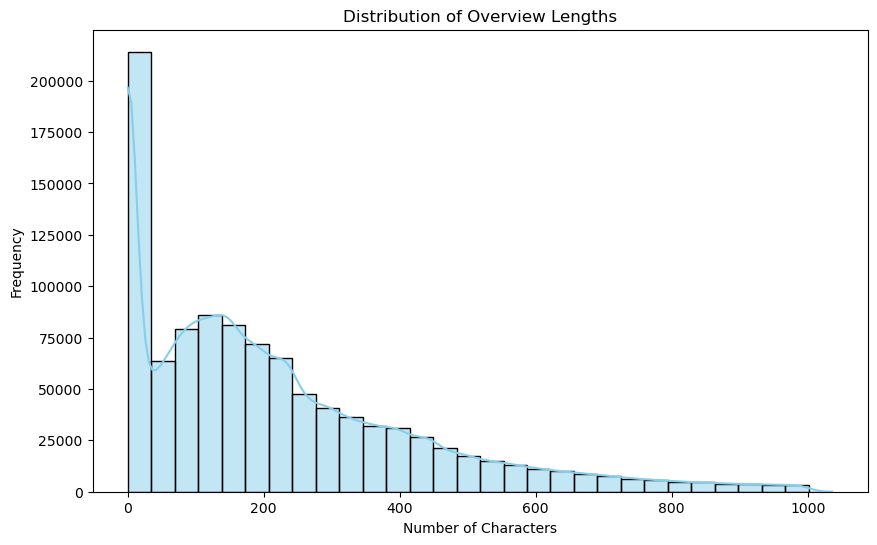

In [272]:
# 1. Overview Length Distribution

# Create a new column for the length of the overview
df_selected.loc[:, 'overview_length'] = df_selected['overview'].apply(lambda x: len(x) if isinstance(x, str) else 0)

plt.figure(figsize=(10, 6))
sns.histplot(df_selected['overview_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Overview Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

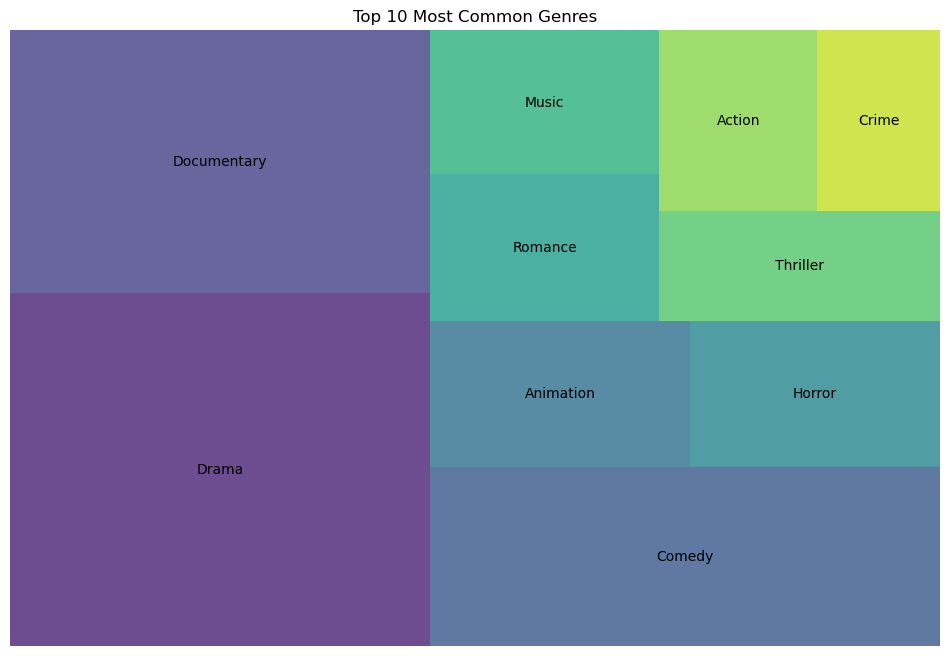

In [274]:
# 3. Genres Distribution 
import squarify

plt.figure(figsize=(12, 8))
squarify.plot(sizes=genre_df['count'], label=genre_df.index, alpha=0.8, color=sns.color_palette('viridis', len(genre_df)))
plt.title('Top 10 Most Common Genres')
plt.axis('off')  # Hide axes for clarity
plt.show()

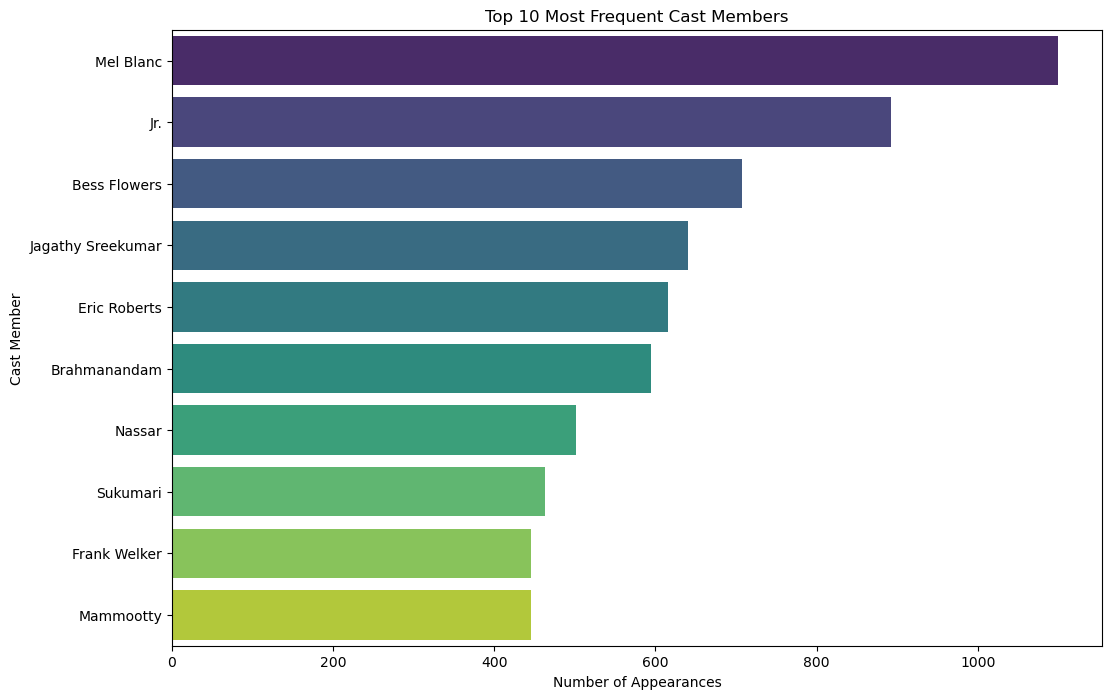

In [284]:
# 3. Top 10 Cast Members

# Process the cast data
cast_series = df_selected['cast'].dropna().apply(lambda x: x.split(','))
all_cast = [actor.strip() for sublist in cast_series for actor in sublist]
cast_counts = Counter(all_cast)

# Convert to DataFrame for plotting
cast_df = pd.DataFrame.from_dict(cast_counts, orient='index', columns=['count']).sort_values('count', ascending=False).head(10)

# Plotting the barplot for top 10 cast members
plt.figure(figsize=(12, 8))
sns.barplot(x=cast_df['count'], y=cast_df.index, palette='viridis', hue=cast_df.index, dodge=False)
plt.legend([], [], frameon=False)  # Suppress the legend as it’s unnecessary here
plt.title('Top 10 Most Frequent Cast Members')
plt.xlabel('Number of Appearances')
plt.ylabel('Cast Member')
plt.show()

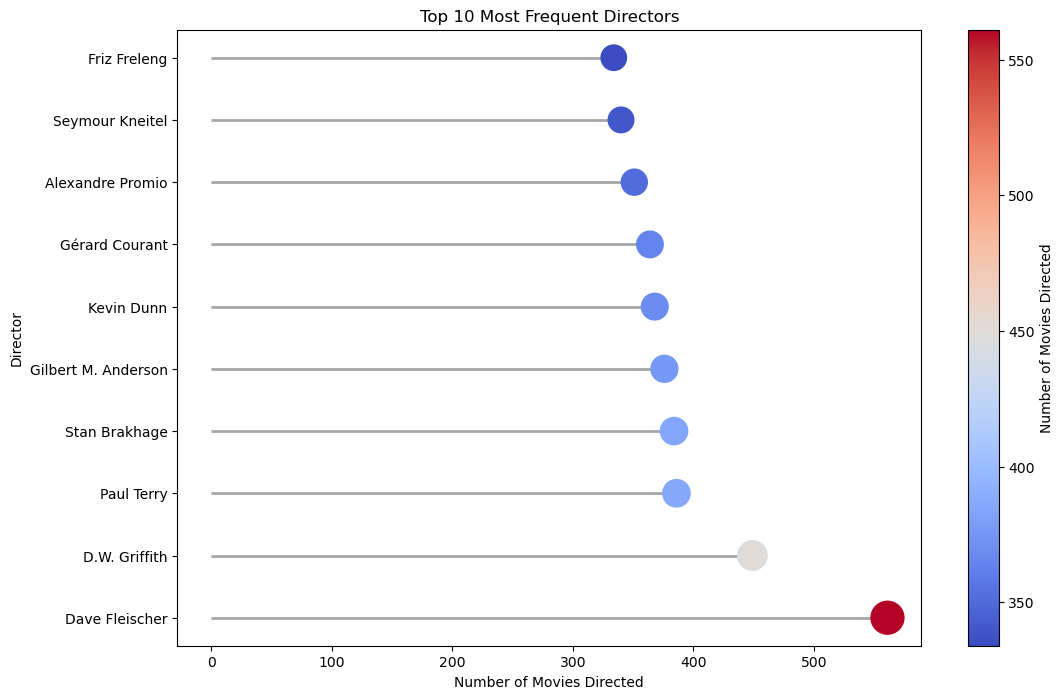

In [286]:
# 4. Top 10 directors
plt.figure(figsize=(12, 8))
# Horizontal lines for each director
plt.hlines(y=director_df.index, xmin=0, xmax=director_df['count'], color='grey', alpha=0.7, linewidth=2)

# Use the 'c' argument for colormap, and specify the colormap you want
plt.scatter(director_df['count'], director_df.index, c=director_df['count'], cmap='coolwarm', s=director_df['count'], zorder=3)

plt.title('Top 10 Most Frequent Directors')
plt.xlabel('Number of Movies Directed')
plt.ylabel('Director')
plt.colorbar(label='Number of Movies Directed')
plt.show()

### Now, we'll be scaling the dataset down for the relevent fields

##### Features that we need to consider from a technical aspect:
- id
- overview

##### Considering the General Audience, the following parameters would be consider as the most before picking a movie to watch:

- title 
- genres
- cast
- director

In [203]:
# Count the unique values in each relevant column
fields = ['id', 'overview', 'title', 'genres', 'cast', 'director']
unique_counts = {field: df[field].nunique() for field in fields}
unique_counts

{'id': 1014981,
 'overview': 817133,
 'title': 863786,
 'genres': 14344,
 'cast': 633788,
 'director': 338138}

In [204]:
df = df[['id', 'overview', 'title', 'genres', 'cast', 'director']]

#updated dataset
df.head()

,id,overview,title,genres,cast,director
0,2,After the coal mine he works at closes and his...,Ariel,"Comedy, Drama, Romance, Crime","Heikki Salomaa, Hanna Jokinen, Matti Pellonpää...",Aki Kaurismäki
1,3,"Nikander, a rubbish collector and would-be ent...",Shadows in Paradise,"Comedy, Drama, Romance","Kati Outinen, Ulla Kuosmanen, Jaakko Talaskivi...",Aki Kaurismäki
2,5,It's Ted the Bellhop's first night on the job....,Four Rooms,Comedy,"Quentin Tarantino, Jennifer Beals, Antonio Ban...","Alexandre Rockwell, Quentin Tarantino, Allison..."
3,6,"Four young friends, while taking a shortcut en...",Judgment Night,"Action, Crime, Thriller","Cuba Gooding Jr., Peter Greene, David L. Crowl...",Stephen Hopkins
4,8,Timo Novotny labels his new project an experim...,Life in Loops (A Megacities RMX),Documentary,NaN,Timo Novotny


## Part-III: Dealing with Missing Values
We'll visualize and handle missing values appropriately.

In [206]:
# Step 1: Analyze Missing Data Proportion in Each Column
missing_data = df.isnull().mean() * 100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
missing_data_report = pd.DataFrame({'Column': missing_data.index, 'Missing_Percentage': missing_data.values})
print("Missing Data Percentage per Column:")
print(missing_data_report)

Missing Data Percentage per Column:
     Column  Missing_Percentage
0      cast           33.263686
1    genres           29.021190
2  director           18.052526
3  overview           17.601344
4     title            0.001084


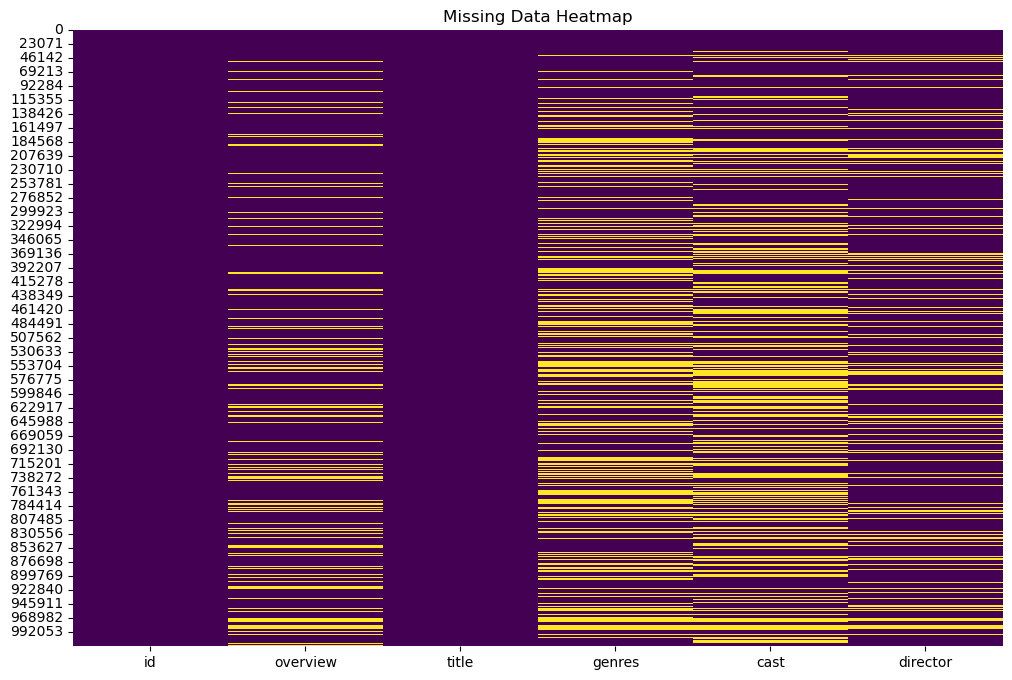

In [207]:
# Step 2: Visualize Missing Data with a Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [208]:
# Step 3: Calculate Row-Wise Missing Data Proportion
row_missing = df.isnull().mean(axis=1)
high_missing_rows = df[row_missing > 0.5]  # Rows with more than 50% missing data
print(f"Number of rows with more than 50% missing data: {len(high_missing_rows)}")

Number of rows with more than 50% missing data: 30696


In [210]:
# Step 4: Perform Impact Analysis and Handle Missing Data
# Drop rows with missing values in key columns for the recommendation system
key_columns = ['title', 'genres', 'cast', 'director']
df.dropna(subset=key_columns, inplace=True)

In [211]:
# Impute missing genres, cast, and director with 'Unknown'
df['genres'] = df['genres'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')

In [212]:
# For columns that are less critical but have a high proportion of missing values, consider dropping them
# Here we drop columns with more than 50% missing values if they are not critical
threshold = 0.5 * len(df)
df = df.loc[:, df.isnull().sum() < threshold]

In [213]:
# For text-based columns with moderate missing values, impute with an empty string if appropriate
for column in df.select_dtypes(include=['object']).columns:
    if df[column].isnull().sum() > 0:
        df[column] = df[column].fillna('')

In [214]:
### Final Missing Data Check
print("Missing Data Check After Handling:")
print(df.isnull().sum())

Missing Data Check After Handling:
id          0
overview    0
title       0
genres      0
cast        0
director    0
dtype: int64


In [215]:
# Save the cleaned dataset(optional)
df.to_csv('cleaned_dataset.csv', index=False)

In [216]:
#number of rows & columns for the cleaned dataset
df.shape

(522705, 6)

## Part-IV: Preparing data for Recommendation System

In [218]:
#selected the first 10 cast members from each movie
def limit_and_reverse_cast_names(cast):
    # Split the cast string by commas
    cast_names = cast.split(', ')
    # Reverse the list
    cast_names.reverse()
    # Select the first 4 names after reversing
    return ', '.join(cast_names[:10])

# Example usage with your dataset
df['cast'] = df['cast'].apply(limit_and_reverse_cast_names)

In [219]:
# Retain start and end spaces while removing inner spaces for each genre name in df['genres']
df['genres'] = df['genres'].apply(lambda x: ','.join([f" {i.strip().replace(' ', '')} " for i in x.split(',')]) if isinstance(x, str) else x)

In [220]:
# Retain start and end spaces while removing inner spaces for director names
df['director'] = df['director'].apply(lambda x: ','.join([f" {i.strip().replace(' ', '')} " for i in x.split(',')]) if isinstance(x, str) else x)

In [221]:
# Retain start and end spaces while removing inner spaces for each cast member's name in df['cast']
df['cast'] = df['cast'].apply(lambda x: ','.join([f" {i.strip().replace(' ', '')} " for i in x.split(',')]) if isinstance(x, str) else x)

In [222]:
# this is how the cast information now looks like,
df['cast'][96744]

' ShawnChristensen , HelgaAthineos , KimAllen , ginopatti , KirstenHollySmith , DanaSegal , FatimaPtacek '

In [223]:
df.loc[96744]

id                                                     157289
overview    At the lowest point of his life, Richie gets a...
title                                                  Curfew
genres                                                 Drama 
cast         ShawnChristensen , HelgaAthineos , KimAllen ,...
director                                    ShawnChristensen 
Name: 96744, dtype: object

In [224]:
df['tags'] = df['overview'] + df['genres'] + df['director'] + df['cast']

In [225]:
new_df = df[['id','title','tags']]

In [226]:
# Use .loc to update the column explicitly
new_df.loc[:, 'tags'] = new_df['tags'].apply(lambda x: x.lower())

In [227]:
# Initialize the Porter Stemmer, a common stemming tool in NLP
ps = PorterStemmer()

# Define a function to perform stemming on a given text
def stem(text):
    # Initialize an empty list to store stemmed words
    y = []

    # Loop through each word in the text, splitting by whitespace
    for i in text.split():
        # Apply stemming to each word and add it to the list
        y.append(ps.stem(i))

    # Join the stemmed words back into a single string and return it
    return " ".join(y)

In [228]:
# Use .loc to apply the stemming function to the 'tags' column
new_df.loc[:, 'tags'] = new_df['tags'].apply(stem)

In [229]:
new_df['tags'][727]

"an up-and-com poker player tri to prove himself in a high-stak match against a long-tim master of the game. drama normanjewison midgewar , ann-margret , barryo'hara , émilegenest , breenahoward , paulravel , dickwinslow , bobbygilbert , howardwendel , georgeholm"

## Part-V: Vectorization

In [231]:
cv = CountVectorizer(max_features = 180, stop_words='english')

In [232]:
vectors = cv.fit_transform(new_df['tags']).toarray()

In [233]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [234]:
cv.get_feature_names_out()

array(['action', 'adventur', 'american', 'anim', 'anoth', 'arriv', 'art',
       'artist', 'attempt', 'away', 'base', 'beauti', 'becaus', 'becom',
       'befor', 'begin', 'best', 'big', 'boy', 'break', 'bring',
       'brother', 'chang', 'child', 'children', 'citi', 'come', 'comedi',
       'coupl', 'crime', 'daughter', 'day', 'death', 'decid', 'die',
       'differ', 'direct', 'director', 'discov', 'documentari', 'doe',
       'drama', 'dream', 'dure', 'end', 'escap', 'event', 'explor',
       'face', 'fall', 'famili', 'family', 'fantasi', 'father', 'featur',
       'feel', 'fight', 'film', 'final', 'follow', 'forc', 'friend',
       'gang', 'girl', 'goe', 'good', 'great', 'group', 'ha', 'head',
       'help', 'hi', 'high', 'histori', 'home', 'hope', 'horror', 'hous',
       'human', 'husband', 'includ', 'investig', 'jean', 'job', 'join',
       'journey', 'just', 'kill', 'know', 'later', 'lead', 'learn',
       'leav', 'left', 'life', 'like', 'littl', 'live', 'local', 'long',
      

In [246]:
similarity = cosine_similarity(vectors)

MemoryError: Unable to allocate 1.99 TiB for an array with shape (522705, 522705) and data type float64

In [248]:
# trying with the batch processing method
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Perform dimensionality reduction (e.g., PCA)
pca = PCA(n_components=50)  # Reduce to 50 dimensions
reduced_vectors = pca.fit_transform(vectors)

# In order to save from MemoryError, we batch the computation
batch_size = 5000  # Adjust based on your memory capacity
num_samples = reduced_vectors.shape[0]
top_n_similarities = {}

for start in range(0, num_samples, batch_size):
    end = min(start + batch_size, num_samples)
    batch = reduced_vectors[start:end]
    
    # Compute cosine similarities between the current batch and all vectors
    batch_similarity = cosine_similarity(batch, reduced_vectors)
    
    # Save top-N results per row in the batch
    for i in range(batch.shape[0]):
        top_indices = np.argsort(-batch_similarity[i])[:10]  # Get top 10 most similar
        top_n_similarities[start + i] = top_indices

MemoryError: Unable to allocate 19.5 GiB for an array with shape (5000, 522705) and data type float64

In [ ]:
#the similarity count of one movie with other movies of the dataset 
sorted(list(enumerate(similarity[1])), reverse=True, key= lambda x:x[1])[1:7]

In [ ]:
def recommend(movie):
    movie_index = dataset[dataset['title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)),reverse=True, key=lambda x:x[1])[1:6]

    for i in movies_list:
        print(dataset.iloc[i[0]].title)   

In [ ]:
recommend('Deadpool')

In [ ]:
pickle.dump(dataset,open('movies.pkl','wb'))

In [ ]:
pickle.dump(similarity,open('similarity.pkl','wb'))